In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import scipy as sc

from sympy import symbols, Eq, solve, simplify
from pprint import pprint
from IPython.display import display, Math

In [13]:
x_k = symbols('x_k')
x_k1 = symbols('x_{k+1}')
x_N = symbols('x_N')
a = symbols('a')
b = symbols('b')
u_k = symbols('u_k')
u_star = symbols('u^*')
r = symbols('r')
Jnot = symbols('J_{not}')
J2 = symbols('J_2')
k = symbols('k')
N = symbols('N')
i_sympy = symbols('i')
H_k = symbols('H^k')
cost_L = symbols('L^k')
lmda = symbols('lambda')
lmda_k = symbols(f'lambda_{k}')
lmda_k1 = symbols(f'lambda_{k}+1')
lmda_N = symbols(f'lambda_{N}')
phi = symbols('phi')


N_val = 5
a_val = 2
b_val = 1
x_0 = 3
r_N = 0
r_val = 1

def f(x, u):
    val = a*x + b*u
    return val


display(Math(r'system\ dynamics: x_{k+1} = ' + sp.latex(f(x_k, u_k))))

f(x_k, u_k)

lmda_N

<IPython.core.display.Math object>

lambda_N

## part a 
finding the homogeneous solution of the differential equation

$$
\begin{align*}
x_{k+1} &= 2x_k  \\
x_k &= 2^k x_0
\end{align*}
$$


Text(0.5, 1.0, 'State Trajectory with zero input')

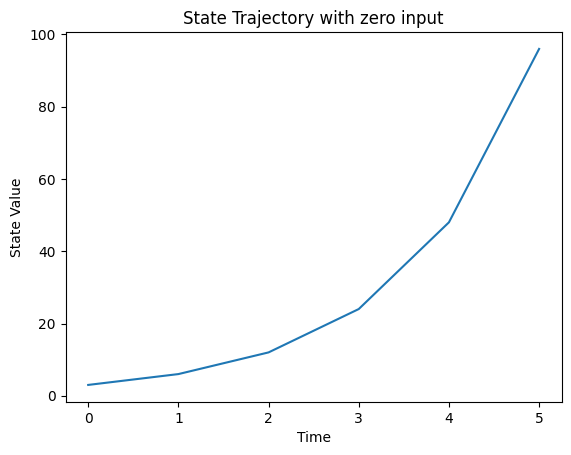

In [11]:
xk = x_0
state_values = [xk]

for _ in range(N_val):
    x_kplus1 = f(xk, 0)            # this is zero input response
    xk = x_kplus1.subs(a, a_val).subs(b, b_val)
    state_values.append(xk)

plt.plot(state_values)
plt.xlabel('Time')
plt.ylabel('State Value')
plt.title('State Trajectory with zero input')

## part b
### fixed final state

In [4]:
print("Cost function: ")
Jnot = r/2 * sp.Sum(u_k**2, (k, 0, N-1))
display(Math(r'J_{not} = ' + sp.latex(Jnot)))

print("Hamiltonian: ")

eq1 = Eq(H_k, cost_L + lmda_k1 * f(x_k, u_k))
display(Math(sp.latex(eq1)))

eq1 = eq1.subs(a, a_val).subs(b, b_val)
display(Math(sp.latex(eq1)))

eq1 = eq1.subs(cost_L, r/2 * u_k**2).subs(r, r_val)
display(Math(sp.latex(eq1)))

hamiltonian = solve(eq1, H_k)[0]

eq2 = Eq(x_k1, sp.diff(hamiltonian, lmda_k1))
eq3 = Eq(lmda_k, sp.diff(hamiltonian, x_k))
eq4 = Eq(0, sp.diff(hamiltonian, u_k))

print("State update equation: ")
display(Math(sp.latex(eq2)))
display(Math(sp.latex(eq3)))
display(Math(sp.latex(eq4)))

print("Control update equation: ")
uk = solve(eq4, u_k)[0]
xk_1 = solve(eq2, x_k1)[0].subs(u_k, uk)
display(Math(sp.latex(Eq(x_k1, xk_1))))
eq5 = Eq(lmda_k, sp.Pow(a, N-k) * lmda_N).subs(N, N_val).subs(a, a_val).subs(b, b_val)
display(Math(sp.latex(eq5)))
lmdak = solve(eq5, lmda_k)[0].subs(N, N_val).subs(a, a_val).subs(b, b_val)
display(Math(r'\lambda_k = ' + sp.latex(lmdak)))

xk_1 = xk_1.subs(lmda_k1, solve(eq3, lmda_k1)[0]).subs(lmda_k, lmdak)
display(Math(sp.latex(Eq(x_k1, xk_1))))

Cost function: 


<IPython.core.display.Math object>

Hamiltonian: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

State update equation: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Control update equation: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
# xx = x_0
# for i in range(N_val):
#     xx = xk_1.subs(x_k, xx).subs(k, i+1)

xx = a**k*x_0 - b**2/r * lmda_N * a**(N-k) * (1-a**(2*k)) / (1-a**2)

eq6 = Eq(xx, x_N)
display(Math(sp.latex(eq6)))

lmdaN = solve(eq6, lmda_N)[0]
lmdaN = lmdaN.subs(a, a_val).subs(b, b_val).subs(r, r_val).subs(k, N_val).subs(N, N_val)
display(Math(sp.latex(Eq(lmda_N, lmdaN))))

eq7 = Eq(u_star, uk.subs(lmda_k1, lmda_N))
display(Math(sp.latex(eq7)))
ustar = solve(eq7, u_star)[0]
display(Math(sp.latex(Eq(u_star, ustar))))

lamda_N_val = lmdaN.subs(x_N, r_N)
print("Value of lambda_N: ", lamda_N_val)

lambda_k_values = []
for i in range(N_val):
    val = lmdak.subs(k, i+1).subs(lmda_N, lamda_N_val)
    lambda_k_values.append((val))
    
u_star_values = []    
for i in range(N_val):
    val = uk.subs(lmda_k1, lambda_k_values[i]) 
    u_star_values.append(val)
u_star_values.append(0)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Value of lambda_N:  96/341


Text(0.5, 1.0, 'fixed final state')

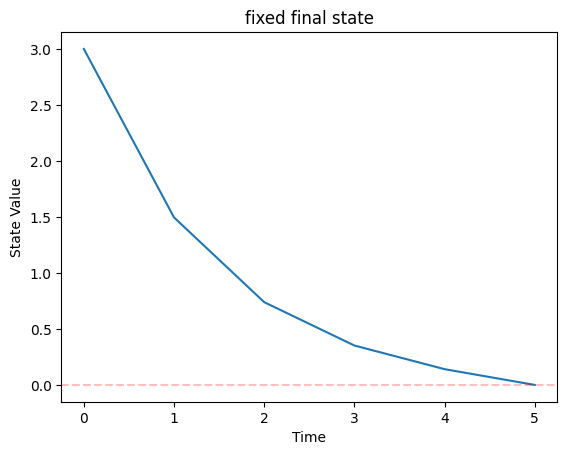

In [12]:
xk = x_0
state_values = [xk]

for i in range(N_val):
    x_kplus1 = f(xk, u_star_values[i])
    xk = x_kplus1.subs(a, a_val).subs(b, b_val)
    state_values.append(xk)

plt.plot(state_values)
plt.xlabel('Time')
plt.ylabel('State Value')
plt.axhline(y=r_N, color='r', linestyle='--', alpha=0.25)
plt.title('fixed final state')

## part c
### free final state

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Text(0.5, 1.0, 'free final state')

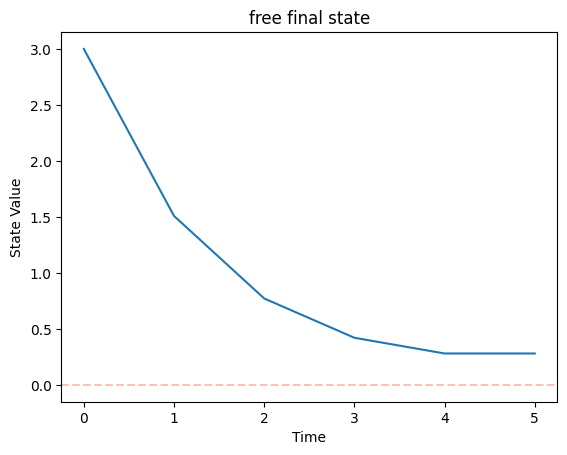

In [56]:
J2 = 5*(x_N - r_N)**2 + r/2 * sp.Sum(u_k**2, (k, 0, N-1))
display(Math(r'J_2 = ' + sp.latex(J2)))

phi_1 = 1/2 * (x_N - r_N)**2
display(Math(sp.latex(phi_1)))

eq8 = Eq(lmda_N, sp.diff(phi_1, x_N))
eq9 = Eq(lmda_N, lmdaN)
display(Math(sp.latex(eq8)))
display(Math(sp.latex(eq9)))

eq10 = Eq(eq8.rhs, eq9.rhs)
display(Math(sp.latex(eq10)))
free_xn_val = solve(eq10, x_N)

free_lamda_n_val = solve(eq8, lmda_N)[0].subs(x_N, free_xn_val[0])

lambda_k_values = []
for i in range(N_val):
    val = lmdak.subs(k, i+1).subs(lmda_N, free_lamda_n_val)
    lambda_k_values.append((val))
    
u_star_values = []    
for i in range(N_val):
    val = uk.subs(lmda_k1, lambda_k_values[i]) 
    u_star_values.append(val)
u_star_values.append(0)

xk = x_0
state_values = [xk]
for i in range(N_val):
    x_kplus1 = f(xk, u_star_values[i])
    xk = x_kplus1.subs(a, a_val).subs(b, b_val)
    state_values.append(xk)


plt.plot(state_values)
plt.xlabel('Time')
plt.ylabel('State Value')
plt.axhline(y=r_N, color='r', linestyle='--', alpha=0.25)
plt.title('free final state')